In [ ]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
100% 1.06G/1.06G [00:36<00:00, 34.0MB/s]
100% 1.06G/1.06G [00:36<00:00, 31.3MB/s]


In [ ]:
!mkdir -p~/.kaggle
!cp kaggle.json ~/.kaggle/

mkdir: invalid option -- '~'
Try 'mkdir --help' for more information.
cp: cannot stat 'kaggle.json': No such file or directory


In [ ]:
# extracting zip file
import zipfile
zip_ref=zipfile.ZipFile('/content/dogs-vs-cats.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [ ]:
#Images are very large due to that processing large amount of images ata a time is difficult due to less ram
#so here we use a concept called Generators these generators will divide our data into batches
#and then everytime it loads a small amount of data into ram after completeing the process then it will load another batch
# and in keras there are two generators one is image dataset from directory

In [ ]:
train_ds=keras.utils.image_dataset_from_directory(directory='/content/train',
                                         labels='inferred',
                                         label_mode='int',
                                         batch_size=32,
                                         image_size=(256,256))

validation_ds=keras.utils.image_dataset_from_directory(directory='/content/test',
                                         labels='inferred',
                                         label_mode='int',
                                         batch_size=32,
                                         image_size=(256,256))

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [ ]:
#normalize
def process(image,label):
  image=tf.cast(image/255.,tf.float32)
  return image,label
train_ds=train_ds.map(process)
validation_ds=validation_ds.map(process)

In [ ]:
# create cnn model
# 3 convolutional layers with 32,64,128
model=Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                      

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics='accuracy')
history=model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 75s 108ms/step - loss: 1.4793 - accuracy: 0.5554 - val_loss: 0.6490 - val_accuracy: 0.6054
Epoch 2/10
625/625 [==============================] - 68s 108ms/step - loss: 0.6133 - accuracy: 0.6494 - val_loss: 0.6360 - val_accuracy: 0.6094
Epoch 3/10
625/625 [==============================] - 63s 101ms/step - loss: 0.5325 - accuracy: 0.7158 - val_loss: 0.5214 - val_accuracy: 0.6910
Epoch 4/10
625/625 [==============================] - 65s 103ms/step - loss: 0.4535 - accuracy: 0.7662 - val_loss: 0.5582 - val_accuracy: 0.7154
Epoch 5/10
625/625 [==============================] - 64s 102ms/step - loss: 0.4306 - accuracy: 0.7804 - val_loss: 0.4505 - val_accuracy: 0.7888
Epoch 6/10
625/625 [==============================] - 65s 103ms/step - loss: 0.3880 - accuracy: 0.8049 - val_loss: 0.4205 - val_accuracy: 0.8066
Epoch 7/10
625/625 [==============================] - 67s 106ms/step - loss: 0.3105 - accuracy: 0.8339 - val_loss: 0.5470 - val_ac

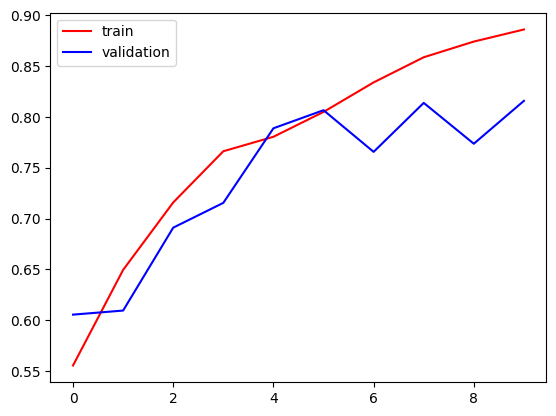

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

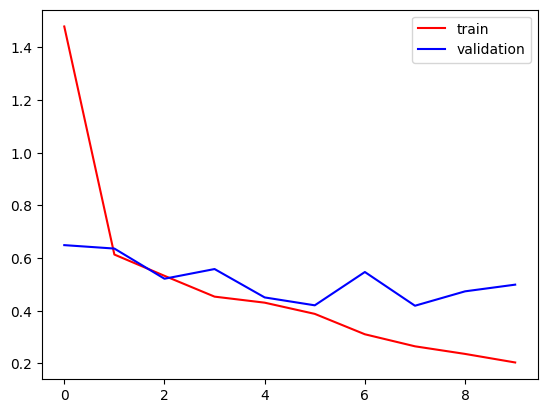

In [ ]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [ ]:
# ways to reduce overfitting

# Add more data
# Data Augementation
# L1/L2 Regularizer
# Dropout
# Batchnormalization
# Reduce Complexity